In [1]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras import utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

In [2]:
count = 0
videoFile = "C:/Users/Ramnivash/Documents/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main (1)/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


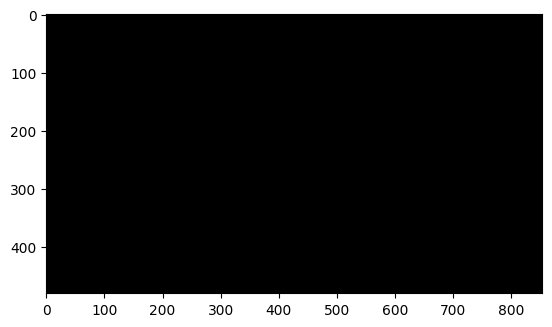

In [3]:
img = plt.imread('0.jpg')   # reading image using its name
plt.imshow(img)

In [4]:
data = pd.read_csv("C:/Users/Ramnivash/Documents/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main (1)/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/mapping.csv")     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [6]:
y = data.Class
dummy_y = utils.to_categorical(y)

In [7]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [8]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [10]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [12]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 20s 5s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [13]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [14]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [15]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25693186 (98.01 MB)
Trainable params: 25693186 (98.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100


5/5 [==============================] - 3s 387ms/step - loss: 0.8038 - accuracy: 0.5871 - val_loss: 0.8548 - val_accuracy: 0.5970
Epoch 2/100
5/5 [==============================] - 1s 226ms/step - loss: 0.4949 - accuracy: 0.7677 - val_loss: 0.7685 - val_accuracy: 0.7313
Epoch 3/100
5/5 [==============================] - 1s 224ms/step - loss: 0.2760 - accuracy: 0.8903 - val_loss: 0.7723 - val_accuracy: 0.7463
Epoch 4/100
5/5 [==============================] - 1s 226ms/step - loss: 0.1347 - accuracy: 0.9613 - val_loss: 0.8551 - val_accuracy: 0.7015
Epoch 5/100
5/5 [==============================] - 1s 224ms/step - loss: 0.1100 - accuracy: 0.9742 - val_loss: 0.8042 - val_accuracy: 0.7612
Epoch 6/100
5/5 [==============================] - 1s 228ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.8343 - val_accuracy: 0.7463
Epoch 7/100
5/5 [==============================] - 1s 224ms/step - loss: 0.0517 - accuracy: 0.9935 - val_loss: 0.8446 - val_accuracy: 0.7612
Epoch 8/100

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
count = 0
videoFile = "C:/Users/Ramnivash/Documents/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main (1)/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [21]:
test = pd.read_csv("C:/Users/Ramnivash/Documents/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main (1)/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/test.csv")

In [22]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [23]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [24]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 3s 3s/step


(9, 7, 7, 512)

In [25]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [26]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 169ms/step


In [27]:
print(predictions)

[[3.0302963e-06 9.9999702e-01]
 [1.5038604e-04 9.9984956e-01]
 [1.6737680e-03 9.9832624e-01]
 [6.1606057e-04 9.9938393e-01]
 [1.5566851e-03 9.9844331e-01]
 [3.2684079e-01 6.7315924e-01]
 [6.7474282e-01 3.2525718e-01]
 [5.0388473e-01 4.9611527e-01]
 [7.4214953e-01 2.5785050e-01]]


In [28]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

No Accident
No Accident
No Accident
No Accident
No Accident
No Accident
Accident
Accident
Accident


In [29]:
count = 0
videoFile = "C:/Users/Ramnivash/Documents/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main (1)/ACCIDENT-DETECTION-WITH-A-REPORTING-SYSTEM-main/Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
predictions_list = []  # List to store predictions

while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count
        cv2.imwrite(filename, frame)
        
        # Read the saved image
        img = plt.imread(filename)
        img = resize(img, preserve_range=True, output_shape=(224,224)).astype(int)
        img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input
        
        # Preprocess image
        img = preprocess_input(img, data_format=None)
        
        # Extract features using pre-trained model
        img_features = base_model.predict(img)
        img_features = img_features.reshape(1, 7*7*512)
        
        # Zero-centering
        img_features = img_features / img_features.max()
        
        # Make prediction
        prediction = model.predict(img_features)
        predictions_list.append(prediction)
        
        # Overlay prediction onto frame
        if prediction[0][0] < prediction[0][1]:
            cv2.putText(frame, "No Accident", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        else:
            cv2.putText(frame, "Accident", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
        # Save the frame with prediction
        cv2.imwrite("prediction_" + filename, frame)
        
        count += 1

cap.release()
print("Done!")

# Now you have predictions for each frame stored in predictions_list
# You can use these predictions to create a new video with prediction overlays if needed.


1/1 [==============================] - 0s 49ms/step
Done!
